<a href="https://colab.research.google.com/github/Carobogasgol/ml_labs_2025/blob/main/lab2_ml_spring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Описание датасета zoo.csv

Этот датасет содержит информацию о 101 животном из зоопарка. Он включает 16 признаков, описывающих различные характеристики животных. Животные относятся к 7 классам:
Млекопитающие, Птицы, Рептилии, Рыбы, Амфибии, Насекомые и Беспозвоночные.

Цель датасета — предсказать класс животного на основе его характеристик. Это отличный набор данных для тех, кто только начинает изучать машинное обучение.

Атрибуты датасета (название и тип данных):
animal_name: Уникальное имя животного (строка)

hair: Наличие шерсти (бинарный: Да/Нет)

feathers: Наличие перьев (бинарный)

eggs: Откладывает ли яйца (бинарный)

milk: Дает ли молоко (бинарный)

airborne: Может летать (бинарный)

aquatic: Водное животное (бинарный)

predator: Хищник (бинарный)

toothed: Наличие зубов (бинарный)

backbone: Наличие позвоночника (бинарный)

breathes: Дышит (бинарный)

venomous: Ядовитое (бинарный)

fins: Наличие плавников (бинарный)

legs: Количество конечностей (числовой: {0, 2, 4, 5, 6, 8})

tail: Наличие хвоста (бинарный)

domestic: Домашнее животное (бинарный)

catsize: Размер с кошку (бинарный)

class_type: Класс животного (число от 1 до 7)

Файл class.csv
Этот файл содержит описание классов животных:

Class_Number: Номер класса (число от 1 до 7)

Number_Of_Animal_Species_In_Class: Количество видов животных в классе

Class_Type: Название класса (текст)

Animal_Names: Список животных, относящихся к данному классу

Файл class.csv
Этот файл содержит описание классов животных:

Class_Number: Номер класса (число от 1 до 7)

Number_Of_Animal_Species_In_Class: Количество видов животных в классе

Class_Type: Название класса (текст)

Animal_Names: Список животных, относящихся к данному классу

In [1]:
import pandas as pd
from google.colab import files
uploaded = files.upload()  # Откроется окно для выбора файла
zoo_data = pd.read_csv('zoo.csv')
class_data = pd.read_csv('class.csv')

zoo_data.shape

Saving class.csv to class.csv
Saving zoo.csv to zoo.csv


(101, 18)

In [ ]:
zoo_data = zoo_data.drop_duplicates()
zoo_data.shape

(101, 18)

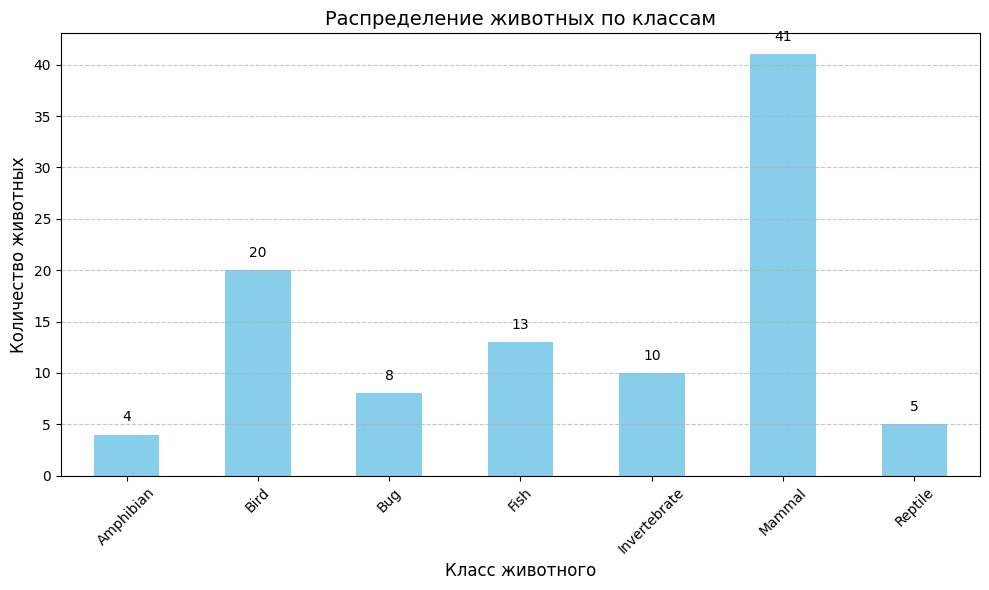

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

zoo_with_class = zoo_data.merge(class_data, left_on='class_type', right_on='Class_Number')

plt.figure(figsize=(10, 6))
class_counts = zoo_with_class['Class_Type'].value_counts().sort_index()
class_counts.plot(kind='bar', color='skyblue')

plt.title('Распределение животных по классам', fontsize=14)
plt.xlabel('Класс животного', fontsize=12)
plt.ylabel('Количество животных', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, count in enumerate(class_counts):
    plt.text(i, count + 1, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Видим, что классы не сбалансированы


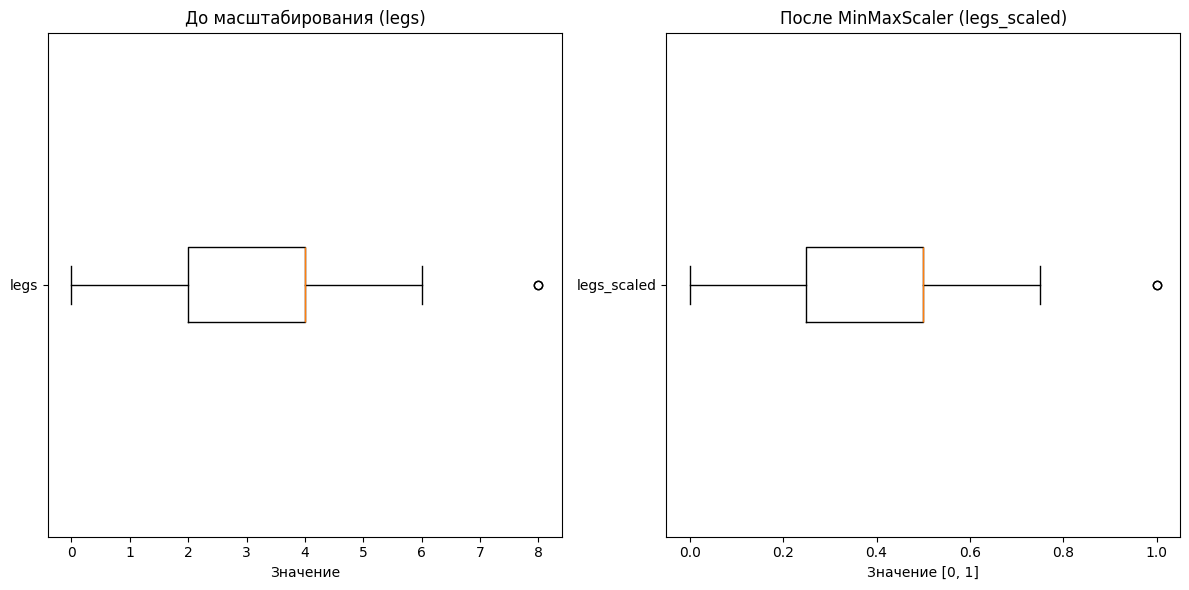

In [3]:
from sklearn.preprocessing import MinMaxScaler

numeric_feature = zoo_data[['legs']]

scaler = MinMaxScaler()
scaled_feature = scaler.fit_transform(numeric_feature)
zoo_data['legs_scaled'] = scaled_feature

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.boxplot(numeric_feature, vert=False)
plt.title('До масштабирования (legs)')
plt.xlabel('Значение')
plt.yticks([1], ['legs'])

plt.subplot(1, 2, 2)
plt.boxplot(zoo_data['legs_scaled'], vert=False)
plt.title('После MinMaxScaler (legs_scaled)')
plt.xlabel('Значение [0, 1]')
plt.yticks([1], ['legs_scaled'])

plt.tight_layout()
plt.show()

Поскольку в моём варианте предлагается использовать DecisionTreeClassifier и KNN classifier, то KNN classifier сможет выучить ложную порядковую зависимость(исказит расстояния и ухудшит модель), и поэтому лучше использовать One-Hot Encoder

In [ ]:
print("Исходные столбцы:", zoo_data.columns.tolist())

bool_columns = [
    'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic',
    'predator', 'toothed', 'backbone', 'breathes', 'venomous',
    'fins', 'tail', 'domestic', 'catsize'
]

bool_ohe = pd.get_dummies(
    zoo_data[bool_columns],
    prefix=bool_columns,
    prefix_sep='_',
    columns=bool_columns  # Явно указываем столбцы для кодирования
)

class_ohe = pd.get_dummies(zoo_data[['class_type']], prefix='class', prefix_sep='_')

final_data = pd.concat([
    zoo_data[['animal_name']],
    zoo_data[['legs']],
    bool_ohe,
    class_ohe
], axis=1)

print(final_data.head(3))


Исходные столбцы: ['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type']
  animal_name  legs  hair_0  hair_1  feathers_0  feathers_1  eggs_0  eggs_1  \
0    aardvark     4   False    True        True       False    True   False   
1    antelope     4   False    True        True       False    True   False   
2        bass     0    True   False        True       False   False    True   

   milk_0  milk_1  ...  venomous_1  fins_0  fins_1  tail_0  tail_1  \
0   False    True  ...       False    True   False    True   False   
1   False    True  ...       False    True   False   False    True   
2    True   False  ...       False   False    True   False    True   

   domestic_0  domestic_1  catsize_0  catsize_1  class_type  
0        True       False      False       True           1  
1        True       False      False       True           1  
2  

Как видно из функции info пустых значений в датасете нет, следовательно применение imputers не имеет смысла


In [ ]:
zoo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


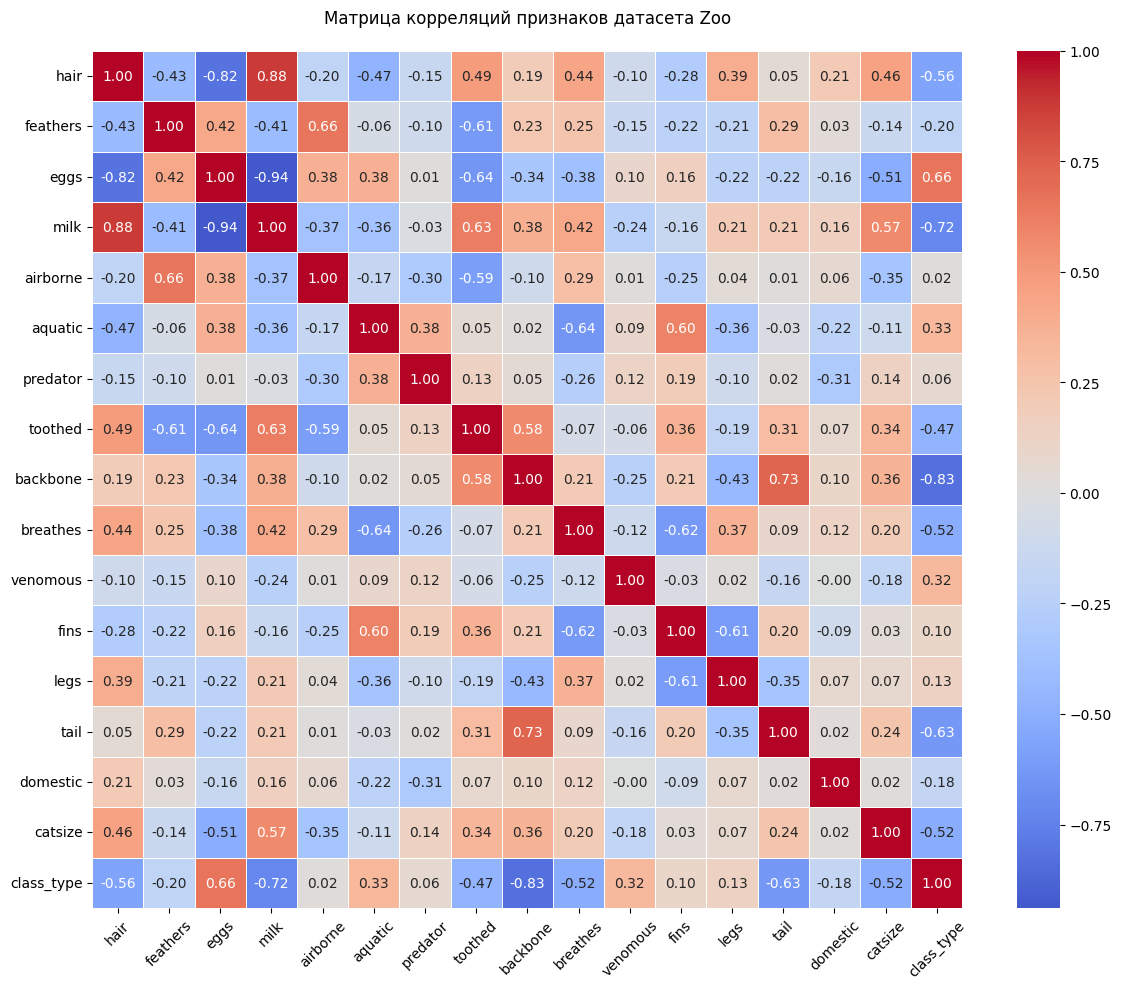

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

zoo_data = pd.read_csv('zoo.csv')

numeric_zoo = zoo_data.drop('animal_name', axis=1)

corr_matrix = numeric_zoo.corr()

plt.figure(figsize=(12, 10))

# Строим тепловую карту
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    cbar=True
)

plt.title("Матрица корреляций признаков датасета Zoo", pad=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

plt.savefig('zoo_correlation_matrix.png', dpi=300)
plt.show()

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

X = zoo_data.drop(['animal_name', 'class_type'], axis=1)
y = zoo_data['class_type']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

param_grid_dt = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

dt = DecisionTreeClassifier()
grid_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='accuracy')
grid_dt.fit(X_train, y_train)
print("Best DT params:", grid_dt.best_params_)



/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best DT params: {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 2}


In [5]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
}

knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)
print("Best KNN params:", grid_knn.best_params_)

Best KNN params: {'n_neighbors': 3}


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


In [6]:
# One-vs-Rest (OvR)
ovr = OneVsRestClassifier(grid_knn.best_estimator_)
ovr.fit(X_train, y_train)

# One-vs-One (OvO)
ovo = OneVsOneClassifier(grid_knn.best_estimator_)
ovo.fit(X_train, y_train)

OneVsOneClassifier(estimator=KNeighborsClassifier(n_neighbors=3))

In [ ]:
from sklearn.metrics import classification_report

models = {
    'Decision Tree': grid_dt.best_estimator_,
    'KNN (OvR)': grid_knn.best_estimator_,
    'KNN (OvO)': ovo
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name}:\n{classification_report(y_test, y_pred)}")

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m


Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         3
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         2
           4       0.67      1.00      0.80         2
           5       0.83      1.00      0.91         5
           6       1.00      0.67      0.80         3

    accuracy                           0.94        31
   macro avg       0.79      0.81      0.79        31
weighted avg       0.92      0.94      0.92        31


KNN (OvR):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         3
           2       0.00      0.00      0.00         1
           3       0.67      1.00      0.80         2
           4       1.00      1.00      1.00         2
           5       0.83      1.00      0.91       

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [7]:
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=np.unique(y_encoded))
n_classes = y_test_bin.shape[1]

y_score = grid_dt.best_estimator_.predict_proba(X_test)

In [8]:
y_score = ovo.decision_function(X_test)

In [9]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

precision_micro, recall_micro, _ = precision_recall_curve(y_test_bin.ravel(), y_score.ravel())
print(f"Micro-average PR AUC: {auc(recall_micro, precision_micro):.2f}")

precision_macro = []
recall_macro = []
for i in range(n_classes):
    prec, rec, _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    precision_macro.append(auc(rec, prec))
print(f"Macro-average PR AUC: {np.mean(precision_macro):.2f}")

Micro-average PR AUC: 0.91
Macro-average PR AUC: 1.00


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, roc_curve, auc
from itertools import cycle

y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))
def plot_pr_roc_curves(y_true, y_scores, n_classes, model_name):
    colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'purple'])

    plt.figure(figsize=(12, 5))

    precision = dict()
    recall = dict()
    average_precision = dict()
    for i, color in zip(range(n_classes), colors):
        precision[i], recall[i], _ = precision_recall_curve(y_true[:, i], y_scores[:, i])
        average_precision[i] = auc(recall[i], precision[i])
        plt.plot(recall[i], precision[i], color=color, lw=2,
                 label='Class {0} (AP = {1:0.2f})'.format(i, average_precision[i]))

    precision["micro"], recall["micro"], _ = precision_recall_curve(
        y_true.ravel(), y_scores.ravel())
    average_precision["micro"] = auc(recall["micro"], precision["micro"])
    plt.plot(recall["micro"], precision["micro"],
             label='Micro-average (AP = {0:0.2f})'.format(average_precision["micro"]),
             color='gold', linestyle=':', linewidth=4)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve ({model_name})')
    plt.legend(loc="lower left")
    plt.grid()
    plt.show()

    plt.figure(figsize=(12, 5))

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i, color in zip(range(n_classes), colors):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

    fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_scores.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    plt.plot(fpr["micro"], tpr["micro"],
             label='Micro-average (AUC = {0:0.2f})'.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes
    roc_auc["macro"] = auc(all_fpr, mean_tpr)
    plt.plot(all_fpr, mean_tpr,
             label='Macro-average (AUC = {0:0.2f})'.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({model_name})')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

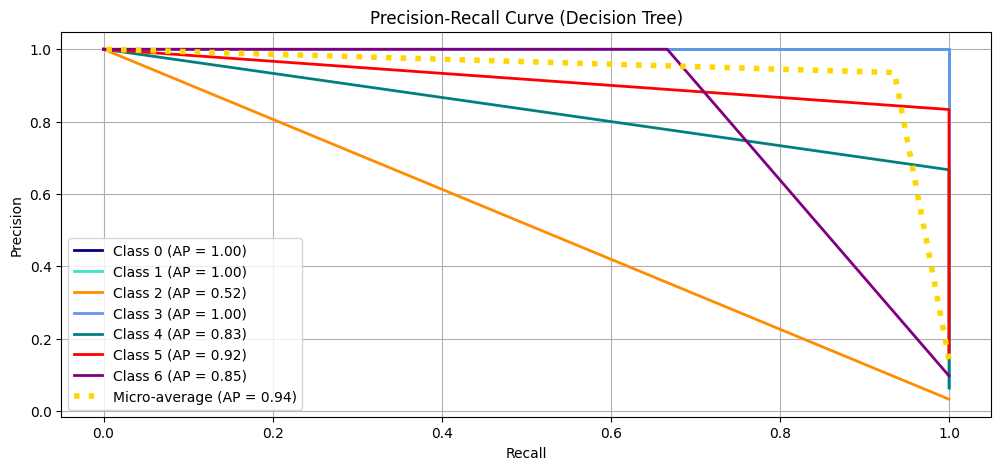

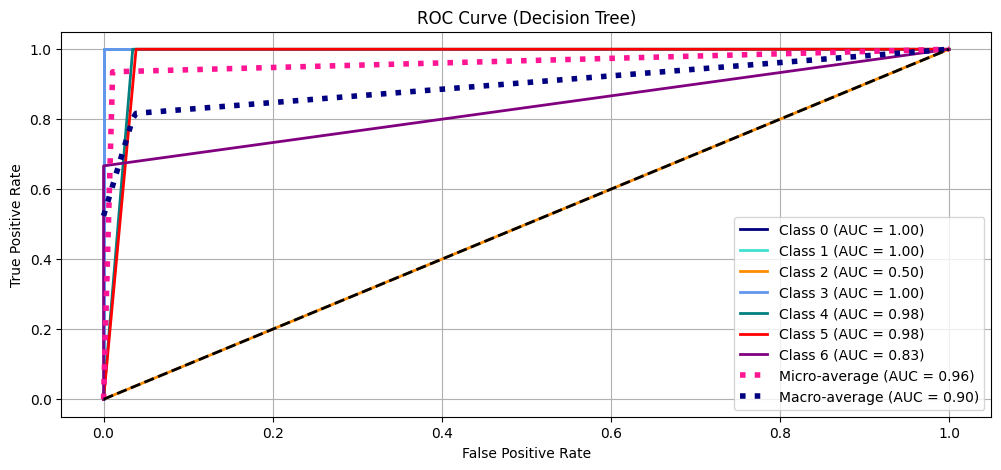

In [ ]:
y_scores_dt = grid_dt.predict_proba(X_test)

plot_pr_roc_curves(y_test_bin, y_scores_dt, n_classes=7, model_name="Decision Tree")

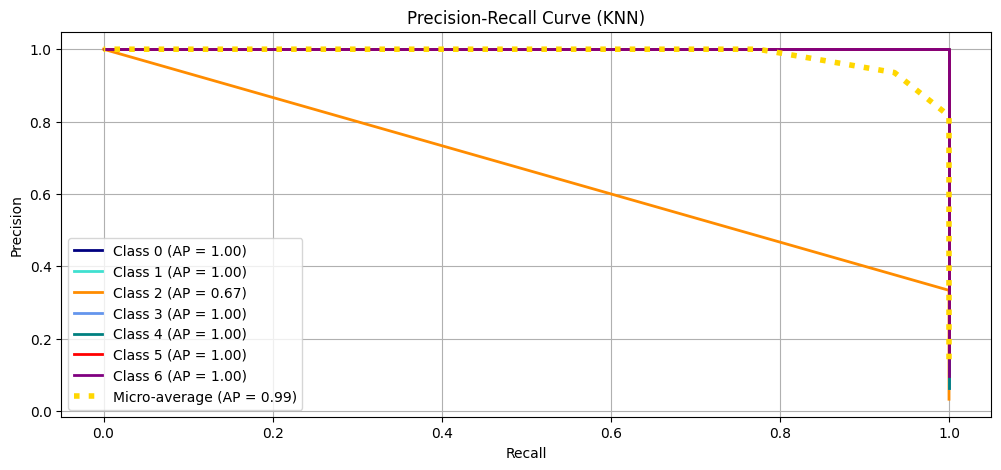

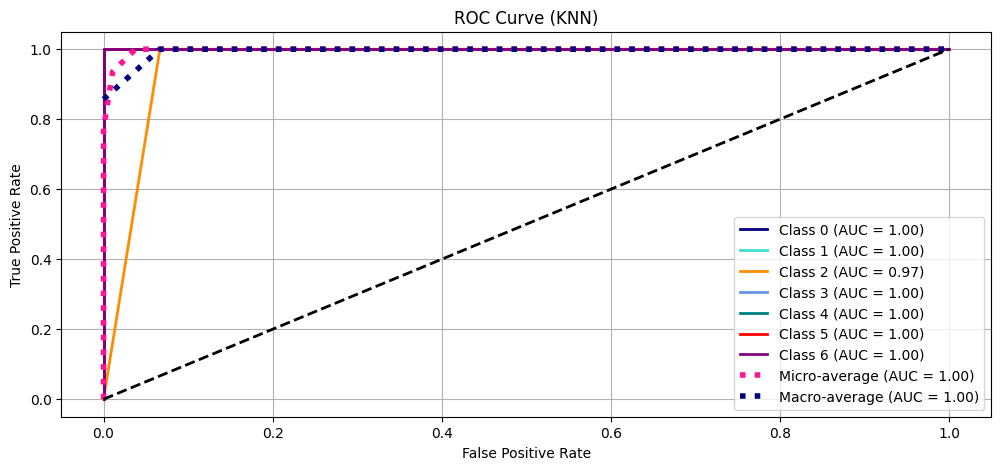

In [15]:
y_scores_knn = grid_knn.predict_proba(X_test)

plot_pr_roc_curves(y_test_bin, y_scores_knn, n_classes=7, model_name="KNN")

In [17]:
from sklearn.metrics import auc

def compare_models(models, X_test, y_test_bin):
    results = {}
    for name, model in models.items():
        if hasattr(model, "predict_proba"):
            scores = model.predict_proba(X_test)
        else:
            scores = model.decision_function(X_test)

        fpr, tpr, _ = roc_curve(y_test_bin.ravel(), scores.ravel())
        roc_auc = auc(fpr, tpr)

        precision, recall, _ = precision_recall_curve(y_test_bin.ravel(), scores.ravel())
        pr_auc = auc(recall, precision)

        results[name] = {'ROC AUC': roc_auc, 'PR AUC': pr_auc}

    return pd.DataFrame(results)

models = {'Decision Tree': grid_dt, 'KNN': grid_knn}
comparison = compare_models(models, X_test, y_test_bin)
print(comparison)

         Decision Tree       KNN
ROC AUC       0.962366  0.997572
PR AUC        0.940092  0.986774


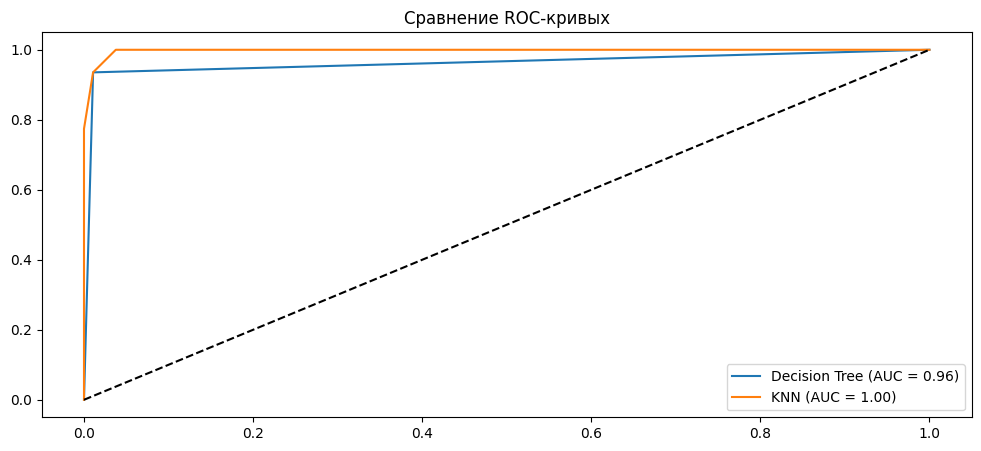

In [18]:
plt.figure(figsize=(12, 5))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        scores = model.predict_proba(X_test)
    else:
        scores = model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), scores.ravel())
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('Сравнение ROC-кривых')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15, 20))
plt.suptitle('Поклассовое сравнение ROC-кривых', y=1.02, fontsize=16)

colors = plt.cm.rainbow(np.linspace(0, 1, n_classes))

for i, color in zip(range(n_classes), colors):
    plt.subplot(4, 2, i+1)

    fpr_dt, tpr_dt, _ = roc_curve(y_test_bin[:, i], grid_dt.predict_proba(X_test)[:, i])
    roc_auc_dt = auc(fpr_dt, tpr_dt)
    plt.plot(fpr_dt, tpr_dt, color='red', lw=2,
             label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')

    knn_proba = grid_knn.predict_proba(X_test)[:, i]
    fpr_knn, tpr_knn, _ = roc_curve(y_test_bin[:, i], knn_proba)
    roc_auc_knn = auc(fpr_knn, tpr_knn)
    plt.plot(fpr_knn, tpr_knn, color='blue', lw=2,
             label=f'KNN (AUC = {roc_auc_knn:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Class {i}')
    plt.legend(loc="lower right")
    plt.grid(True)

plt.tight_layout()
plt.show()

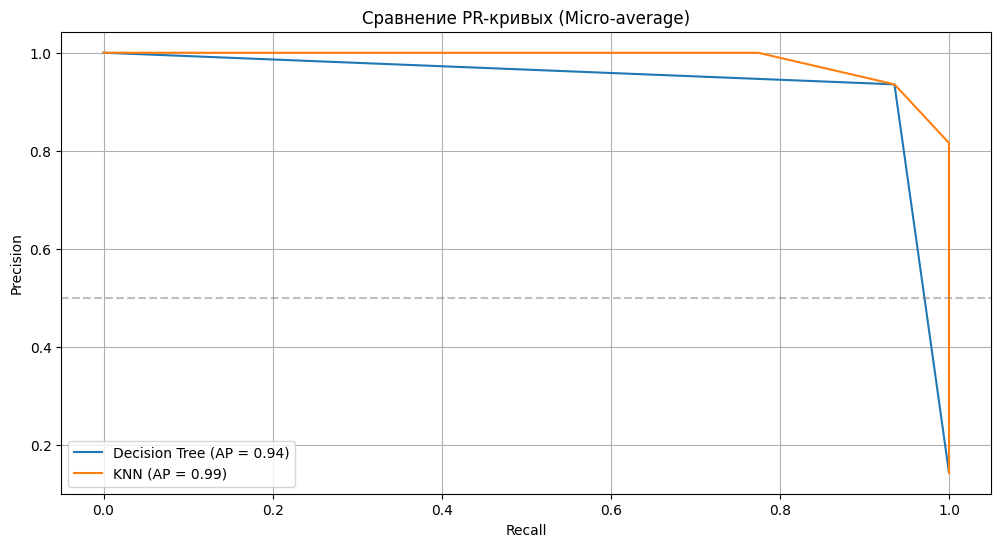

In [19]:
plt.figure(figsize=(12, 6))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        scores = model.predict_proba(X_test)
    else:
        scores = model.decision_function(X_test)

    precision, recall, _ = precision_recall_curve(y_test_bin.ravel(), scores.ravel())
    plt.plot(recall, precision, label=f'{name} (AP = {auc(recall, precision):.2f})')

plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Сравнение PR-кривых (Micro-average)')
plt.legend()
plt.grid()
plt.show()

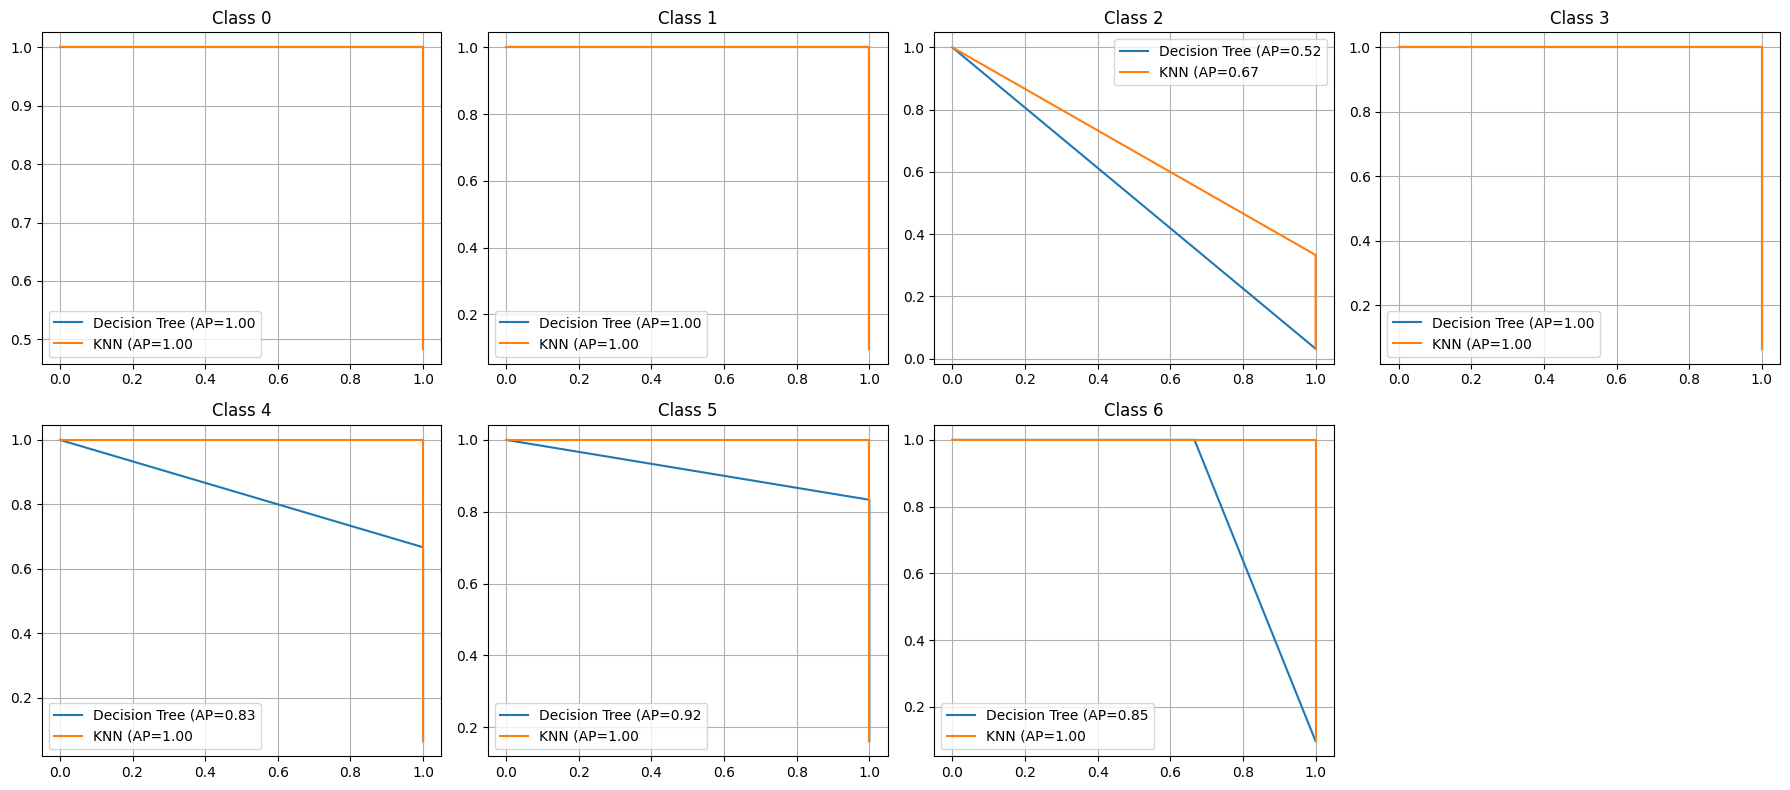

In [20]:
fig, axes = plt.subplots(2, 4, figsize=(18, 8))
for i, ax in enumerate(axes.flat):
    if i >= n_classes:
        fig.delaxes(ax)
        continue

    for name, model in models.items():
        if hasattr(model, "predict_proba"):
            scores = model.predict_proba(X_test)[:, i]
        else:
            scores = model.decision_function(X_test)[:, i]

        precision, recall, _ = precision_recall_curve(y_test_bin[:, i], scores)
        ax.plot(recall, precision, label=f'{name} (AP={auc(recall, precision):.2f}')

    ax.set_title(f'Class {i}')
    ax.legend()
    ax.grid()

plt.tight_layout()
plt.show()